# Processing TESS sector 9 data for TOI4504

In [7]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../data/TOI-4504/downloads/'

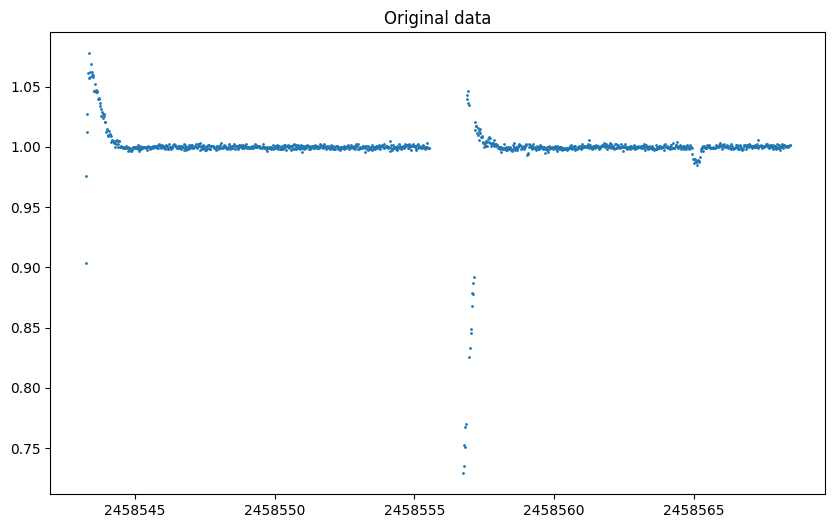

,time,flux,flux_err
0,2.458543e+06,0.903500,0.00124
1,2.458543e+06,0.975707,0.00124
2,2.458543e+06,1.012023,0.00124
3,2.458543e+06,1.026949,0.00124
4,2.458543e+06,1.061167,0.00124
...,...,...,...
1143,2.458568e+06,0.999871,0.00124
1144,2.458568e+06,1.001000,0.00124
1145,2.458568e+06,1.000952,0.00124
1146,2.458568e+06,1.001237,0.00124


In [8]:
full_path = path+"9_QLP_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

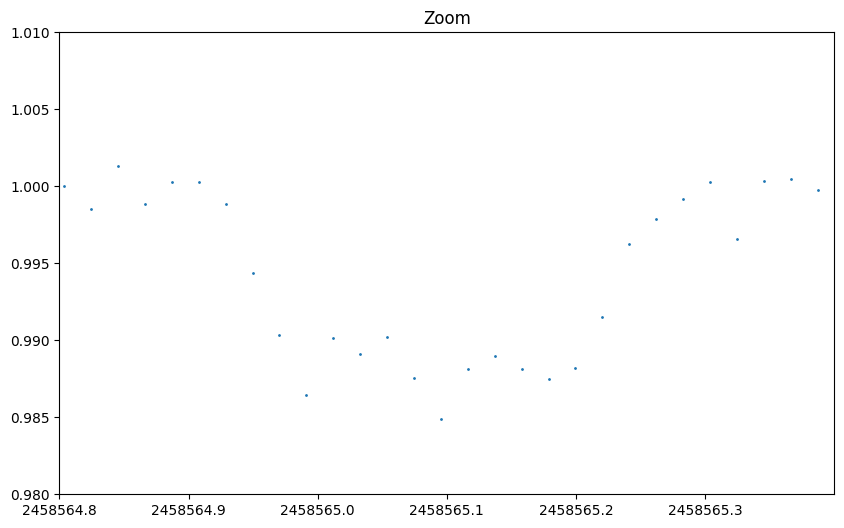

In [15]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458564.8, right=2458565.4, top=1.01, bottom=0.98)

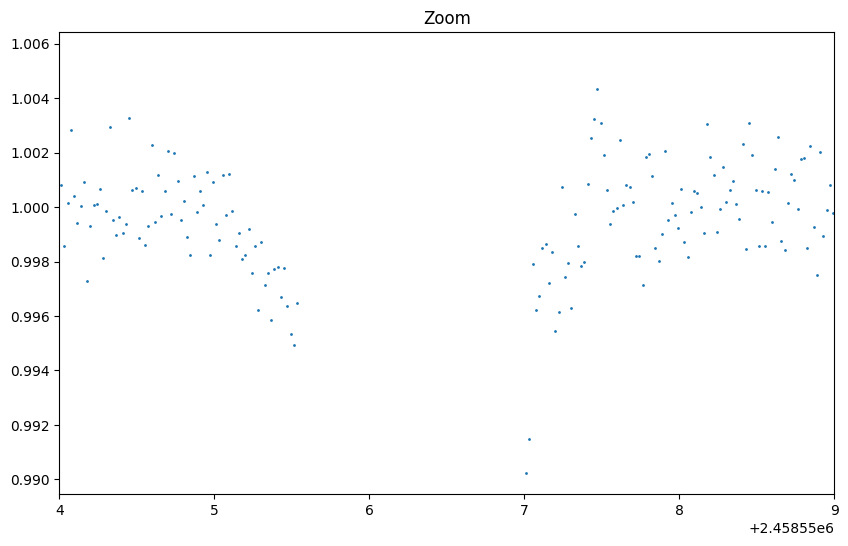

In [4]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458554, right=2458559)

In [5]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458544e+06,0.990558,0.003215
1,2.458544e+06,0.993281,0.003184
2,2.458544e+06,0.996401,0.003153
3,2.458544e+06,1.001547,0.003124
4,2.458544e+06,0.995184,0.003102
...,...,...,...
1110,2.458568e+06,0.997804,0.001778
1111,2.458568e+06,0.998007,0.001785
1112,2.458568e+06,0.997486,0.001794
1113,2.458568e+06,0.997344,0.001812


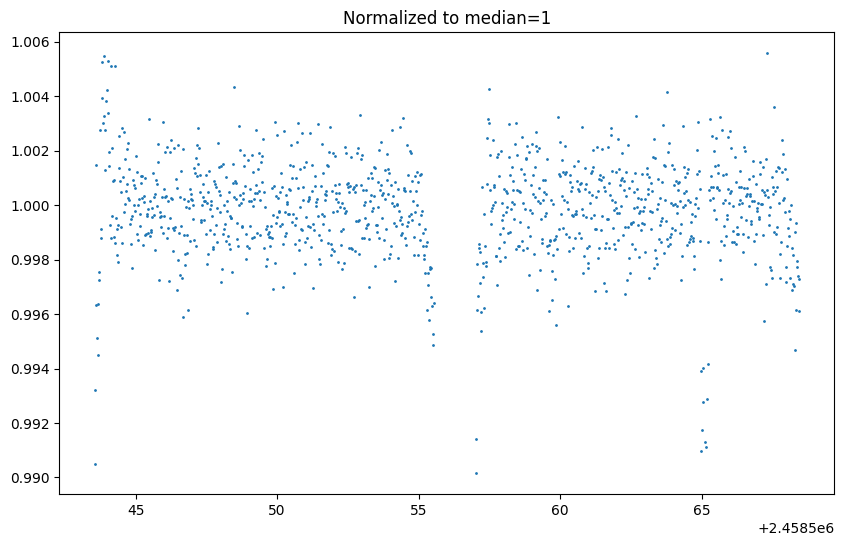

,time,flux,flux_err
0,2.458544e+06,0.990489,0.003215
1,2.458544e+06,0.993212,0.003184
2,2.458544e+06,0.996332,0.003153
3,2.458544e+06,1.001477,0.003123
4,2.458544e+06,0.995115,0.003102
...,...,...,...
1110,2.458568e+06,0.997735,0.001778
1111,2.458568e+06,0.997937,0.001785
1112,2.458568e+06,0.997416,0.001794
1113,2.458568e+06,0.997275,0.001812


In [6]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [7]:
df2csv(df, full_path[:-4]+"_p.csv")